In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('wine.csv')

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
feature_columns=df.drop('Type',axis=1).columns

In [7]:
feature_columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [8]:
X=df.drop('Type',axis=1)

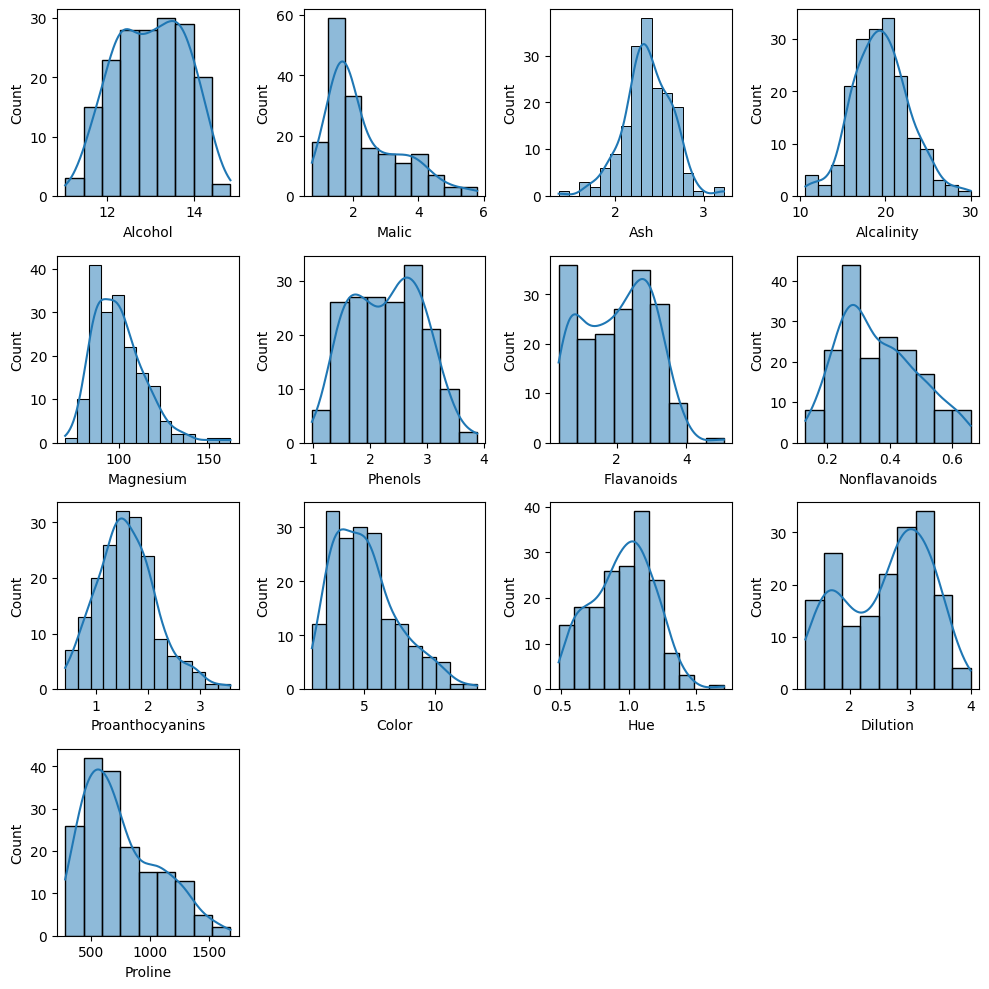

In [9]:
plt.figure(figsize=(10,10))
for i,name in enumerate(feature_columns,start=1):
    plt.subplot(4,4,i)
    sns.histplot(x=df[name],kde=True)
plt.tight_layout()
plt.show()

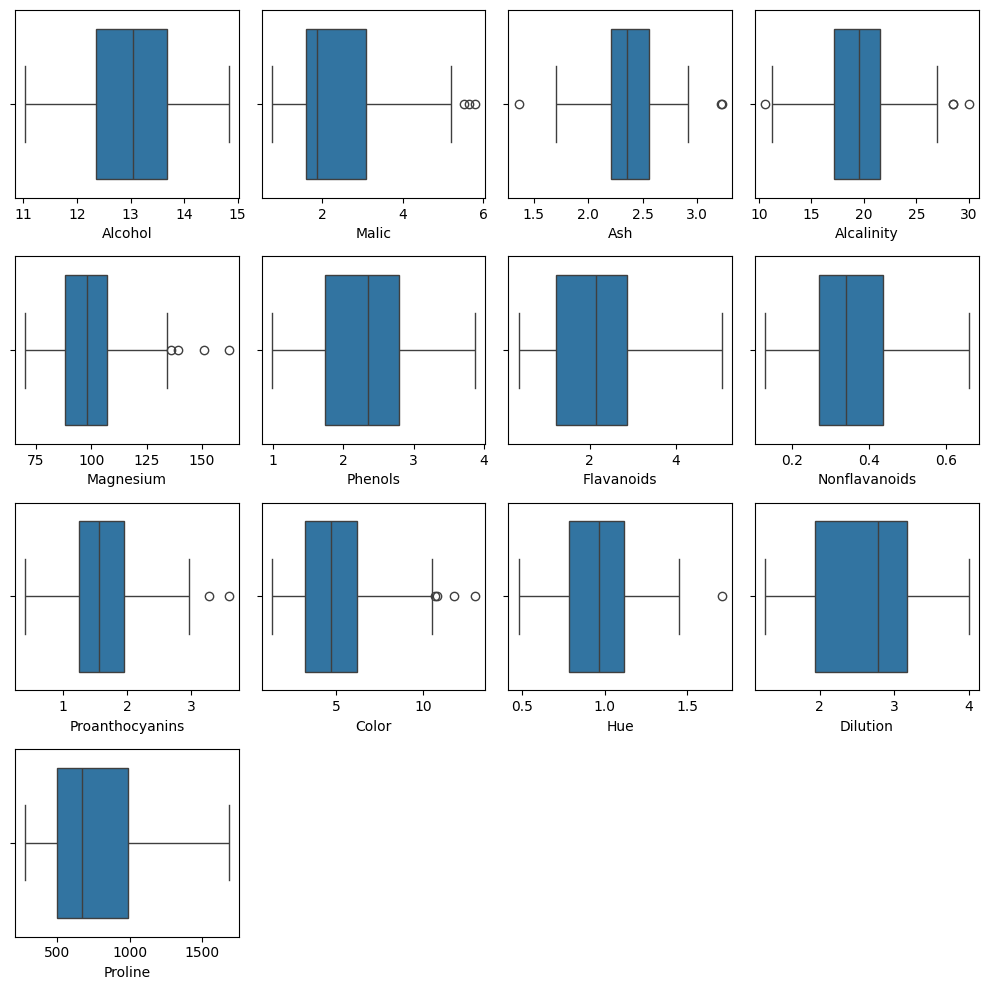

In [10]:
plt.figure(figsize=(10,10))
for i,name in enumerate(feature_columns,start=1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[name])
plt.tight_layout()
plt.show()

In [11]:
for col_name in feature_columns:
    Q1=df[col_name].quantile(0.25)
    Q3=df[col_name].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    
    df[col_name]=df[col_name].clip(lower_limit,upper_limit)

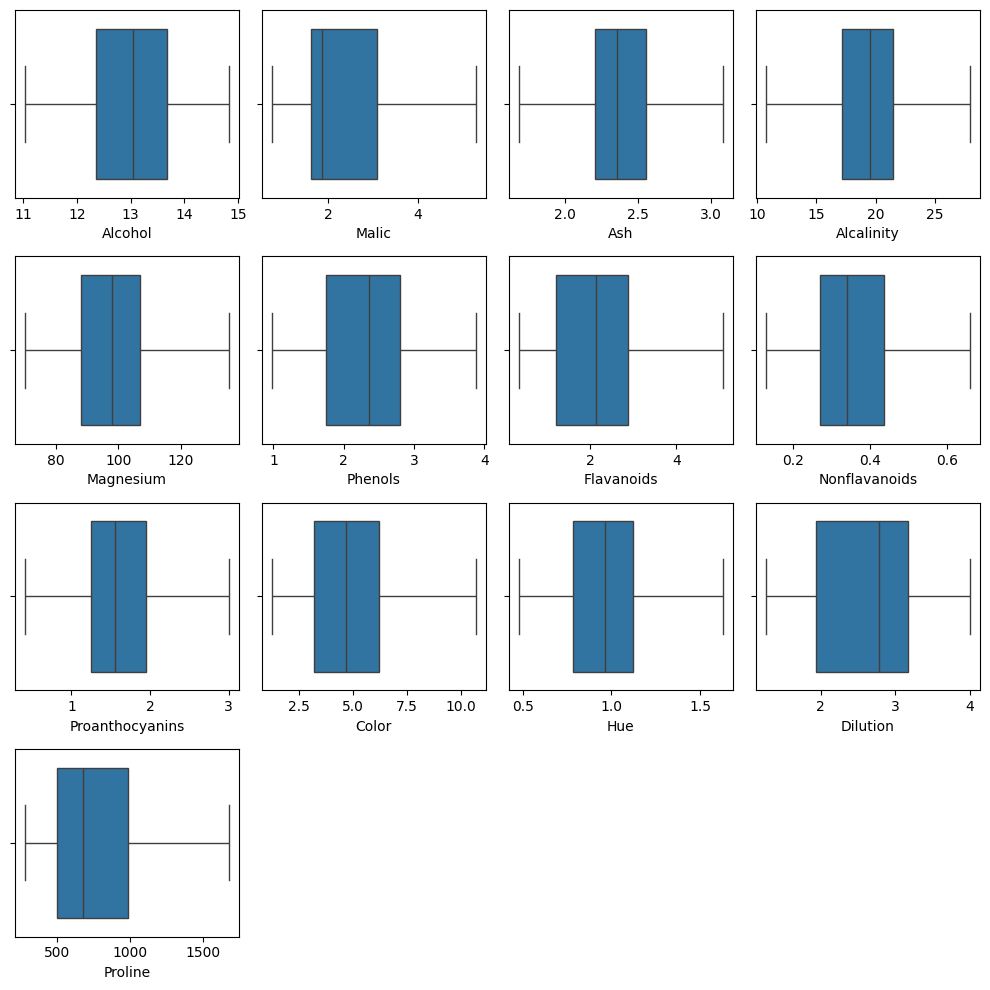

In [12]:
plt.figure(figsize=(10,10))
for i,name in enumerate(feature_columns,start=1):
    plt.subplot(4,4,i)
    sns.boxplot(x=df[name])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scale=StandardScaler()

In [15]:
X_scaled=scale.fit_transform(X)

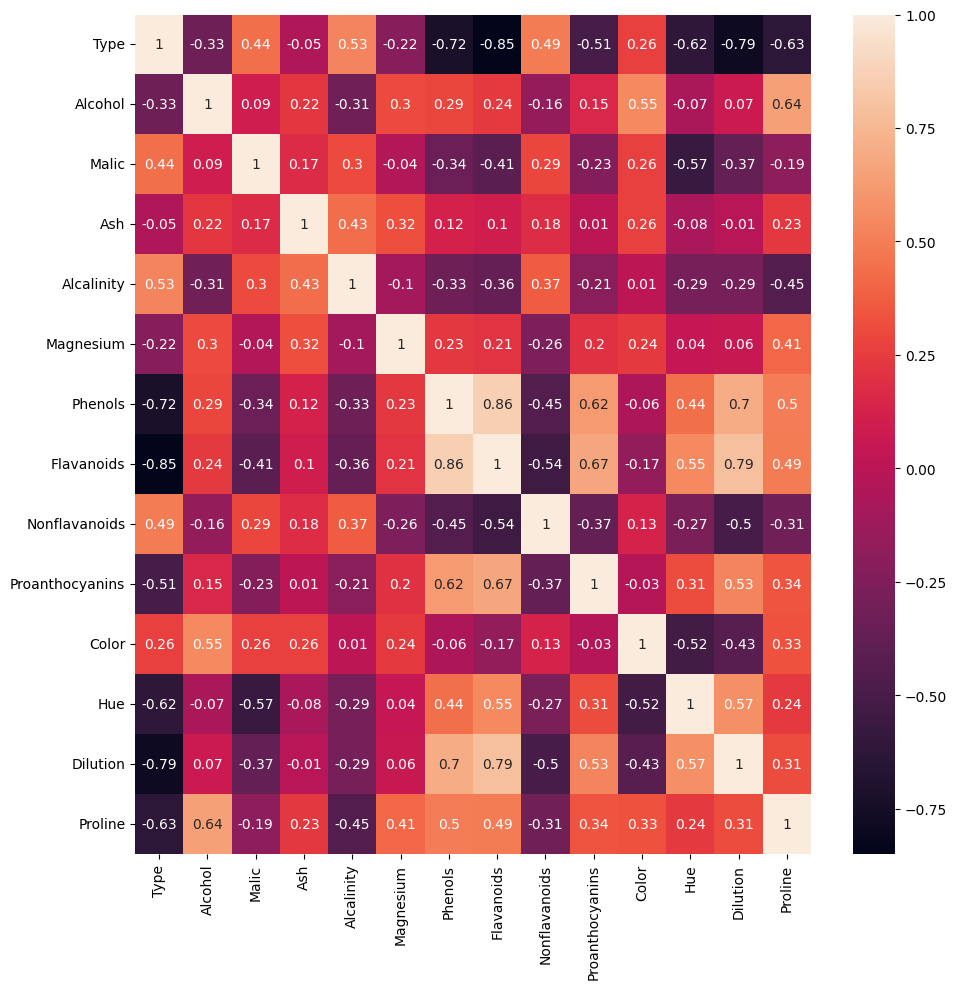

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(round(df.corr(),2),annot=True)
plt.tight_layout()
plt.show()

In [17]:
# Applying K-means clustering before scaling the features
from sklearn.cluster import KMeans

In [18]:
wcss=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_scaled)
    wcss.append(kmean.inertia_)

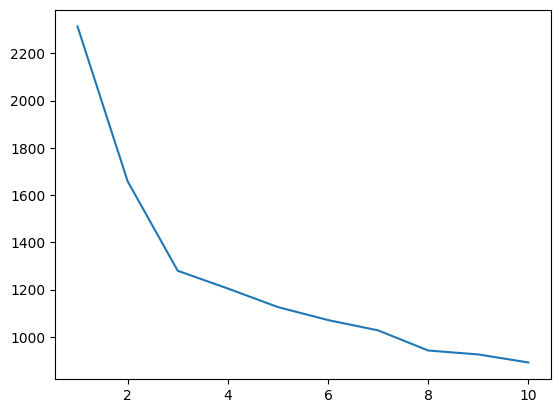

In [19]:
# Elbow Method to find the optimal value of n_cluster
plt.plot(range(1,11),wcss)
plt.show()

In [20]:
# picking n_clustKers =3
kmeans=KMeans(n_clusters=3)
df['Kmeans before']=kmeans.fit_predict(X_scaled)

In [21]:
labels=kmeans.labels_

In [22]:
from sklearn.metrics import silhouette_score
score_before=round(silhouette_score(X_scaled,labels),2)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [25]:
pca.explained_variance_

array([4.73243698, 2.51108093])

In [26]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [27]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283]])

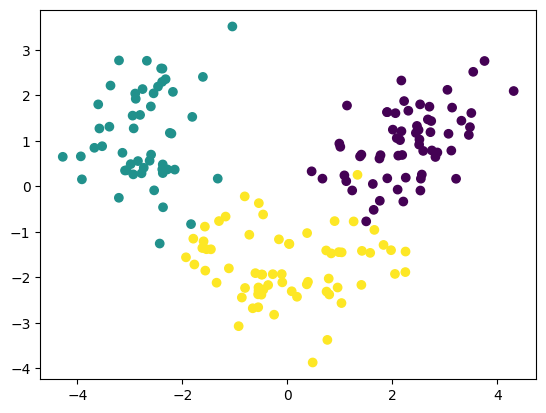

In [28]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels)
plt.show()


In [29]:
kmeans1=KMeans(n_clusters=3)

In [30]:
df['KMeans after pca']=kmeans1.fit_predict(X_pca)

In [31]:
new_labels=kmeans1.labels_

In [32]:
score_after=round(silhouette_score(X_pca,new_labels),2)

In [33]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans before,KMeans after pca
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,1


In [34]:
pd.DataFrame({'K means':['Before PCA','After PCA'],
             'Silhouette Score':[score_before,score_after]}).set_index('K means')

,Silhouette Score
K means,
Before PCA,0.29
After PCA,0.56
